# Milwaukee vs Portland

## Introduction

I live in Milwaukee and for business I have traveled to the west coast quite a bit, specifically to Portland. I remember running across this article: https://www.salon.com/2014/08/20/milwaukee_is_the_new_portland_partner and wondering - is this really true? They do feel similar, but what does the data say? Do they have similarities in the make-up of their neighborhoods? This project will explore similarities and differences of the distinct make-up of both cities at the neighborhood and city-wide level by describing and clustering neighborhoods by venue types using a K-Means clustering algorithm and exploring the frequencies of occurance of discrete venue types. We will compare and contrast the results of our findings.

We will be exploring the neighborhoods using a combination of FourSquare's APIs for venues and locations with a combination of open source datasets to define our neighborhoods.

- https://en.wikipedia.org/wiki/List_of_neighborhoods_of_Milwaukee - we will use this list as the index of neighborhoods in Milwaukee
- https://portlandneighborhood.com/portlandzipcodes - we will use this data to identity and come up with centroids for our Portland neighborhoods
- https://developer.mapquest.com/documentation/open/geocoding-api/address/get/ -open source geocoder

## Libraries

In [9]:
!pip --version

pip 19.1.1 from /opt/conda/envs/Python36/lib/python3.6/site-packages/pip (python 3.6)


In [10]:

import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json # library to handle JSON files

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!pip install geopy
!pip install folium
!pip install beautifulsoup4
!pip install shapely


from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import folium

## Portland
### Model Neighborhoods and Cluster them
#### Get the neighborhood table

In [11]:
!wget -q -O 'pdx_nbh.html' https://portlandneighborhood.com/portlandzipcodes
print('Download finished')

Download finished


#### Parse the HTML table, call Geocoder for lat/lng data and insert them into a dataframe

In [12]:
from bs4 import BeautifulSoup
OPENMAPKEY = 'VXxN7UxBp8JBSPdHmtA47yOABeFy4Zws'
OPENMAP_GCAPI = 'http://open.mapquestapi.com/geocoding/v1/address?key='+OPENMAPKEY+'&location={0},PORTLAND,OR'


with open("pdx_nbh.html") as pdxHtml:
    soup = BeautifulSoup(pdxHtml)
    table = soup.find_all('table')[0]
    row_count = len(table.find_all('tr'))
    
    pdxdf = pd.DataFrame(columns=["Neighborhood","Latitude","Longitude"],index=range(0,row_count))
    
    row_marker = 0
    for row in table.find_all('tr'):
        column = row.find_all('td')[0]
        colText = column.get_text().replace('View the ','').replace(' Neighborhood profile','').replace('Neighborhood profile','')
        pdxdf.iat[row_marker,0] = colText
        response = requests.get(OPENMAP_GCAPI.format(colText)) #geocoder call
        if response.status_code == 200:
            jsonResp = json.loads(response.content.decode('utf-8'))
            lat = jsonResp['results'][0]['locations'][0]['latLng']['lat']
            long = jsonResp['results'][0]['locations'][0]['latLng']['lng']
            print('Hood: ', colText, 'Lat: ', lat, ' Long: ', long)
            pdxdf.iat[row_marker,1] = lat
            pdxdf.iat[row_marker,2] = long
            
        row_marker +=1
            
pdxdf

Hood:  Alameda Lat:  45.548631  Long:  -122.636481
Hood:  Arbor Lodge Lat:  45.571794  Long:  -122.690152
Hood:  Ardenwald Lat:  45.46419  Long:  -122.638301
Hood:  Argay Lat:  45.55283  Long:  -122.523204
Hood:  Arlington Heights Lat:  45.519496  Long:  -122.710667
Hood:  Arnold Creek Lat:  45.444312  Long:  -122.712609
Hood:  Ash Creek Lat:  45.461347  Long:  -122.74238
Hood:  Beaumont Wilshire Lat:  45.550391  Long:  -122.623694
Hood:  Boise Lat:  45.550159  Long:  -122.671878
Hood:  Brentwood Darlington Lat:  45.468707  Long:  -122.597633
Hood:  Bridgeton Lat:  45.602409  Long:  -122.668102
Hood:  Bridlemile Lat:  45.492559  Long:  -122.726693
Hood:  Brooklyn Lat:  45.494819  Long:  -122.651552
Hood:  Buckman Lat:  45.517381  Long:  -122.651954
Hood:  Centennial Lat:  45.505595  Long:  -122.499711
Hood:  Center Lat:  45.520247  Long:  -122.674195
Hood:  Collins View Lat:  45.457979  Long:  -122.68121
Hood:  Concordia Lat:  45.565866  Long:  -122.632216
Hood:  Corbett Terwilliger La

Neighborhood Latitude Longitude
0                         Alameda  45.5486  -122.636
1                     Arbor Lodge  45.5718   -122.69
2                       Ardenwald  45.4642  -122.638
3                           Argay  45.5528  -122.523
4               Arlington Heights  45.5195  -122.711
5                    Arnold Creek  45.4443  -122.713
6                       Ash Creek  45.4613  -122.742
7               Beaumont Wilshire  45.5504  -122.624
8                           Boise  45.5502  -122.672
9            Brentwood Darlington  45.4687  -122.598
10                      Bridgeton  45.6024  -122.668
11                     Bridlemile  45.4926  -122.727
12                       Brooklyn  45.4948  -122.652
13                        Buckman  45.5174  -122.652
14                     Centennial  45.5056    -122.5
15                         Center  45.5202  -122.674
16                   Collins View   45.458  -122.681
17                      Concordia  45.5659  -122.632
18  Corbett Terwilliger Lair Hill  39.7837  -100.446
19             Creston Kenilworth  45.4937  -122.623
20                      Crestwood  45.4508  -122.737
21                          Cully  45.5615  -122.602
22              Downtown Portland  45.5153   -122.68
23                  East Columbia  45.5938  -122.664
24                   Eastmoreland  45.4736  -122.631
25                          Eliot  45.5412  -122.668
26                  Far Southwest  45.4399  -122.736
27                    Forest Park  45.5358  -122.739
28                  Foster Powell  45.4932  -122.589
29                 Cathedral Park  45.5876  -122.759
30                       Glenfair  45.5227  -122.504
31                   Goose Hollow  45.5177  -122.693
32                     Grant Park  45.5401  -122.628
33                  Hayden Island  45.6111  -122.679
34                       Hayhurst  45.4815  -122.729
35                      Hazelwood  45.5239  -122.538
36                  Healy Heights  45.4925  -122.699
37                      Hillsdale  45.4786  -122.695
38                       Hillside  45.5274  -122.713
39                      Hollywood  45.5359   -122.62
40                      Homestead   45.496  -122.687
41              Hosford Abernethy  45.5066  -122.649
42                       Humboldt  45.5605  -122.671
43                      Irvington   45.542  -122.649
44                         Kenton  45.5831  -122.693
45                          Kerns  45.5268  -122.645
46                           King  45.5578  -122.658
47                    Laurelhurst  45.5265  -122.624
48                          Lents  45.4797  -122.565
49                        Linnton  45.6003  -122.787
50                 Lloyd District  45.5314   -122.66
51                  Madison South   45.541  -122.573
52                      Maplewood  45.4719  -122.734
53                        Markham  45.4584  -122.704
54                  Marshall Park  45.4535  -122.696
55                      Mill Park  45.5116  -122.539
56                     Montavilla  45.5191  -122.576
57                Mt Scott Arleta  45.4814  -122.591
58                       Mt Tabor  45.5158    -122.6
59                      Multnomah  45.4662  -122.713
60                      Northwest  45.5052  -122.611
61              Northwest Heights  45.5408  -122.774
62  Portland Northwest Industrial  39.7837  -100.446
63             Old Town Chinatown  45.5249  -122.674
64                       Overlook  45.5591  -122.692
65               Parkrose Heights  45.5402  -122.548
66                       Parkrose  45.5575  -122.551
67                 Pearl District   45.529  -122.682
68                       Piedmont  45.5746  -122.669
69                Pleasant Valley   45.472  -122.507
70                     Portsmouth   45.588  -122.719
71            Powellhurst Gilbert  45.4926  -122.539
72                           Reed  45.4851  -122.632
73                       Richmond  45.5047  -122.623
74                 Rose City Park  45.5384  -1

In [13]:
# Get names of indexes for which column contains string "Milwaukee's" or latitude is less than 42 (error in neighborhood lookup)

indexNames = pdxdf[pdxdf["Latitude"] < float(42)].index
# Delete these row indexes from dataFrame
pdxdf.drop(indexNames , inplace=True)
# Drop last 3 rows as well
pdxdf.drop(pdxdf.tail(3).index,inplace=True) 
pdxdf.reset_index()
pdxdf

Neighborhood Latitude Longitude
0                Alameda  45.5486  -122.636
1            Arbor Lodge  45.5718   -122.69
2              Ardenwald  45.4642  -122.638
3                  Argay  45.5528  -122.523
4      Arlington Heights  45.5195  -122.711
5           Arnold Creek  45.4443  -122.713
6              Ash Creek  45.4613  -122.742
7      Beaumont Wilshire  45.5504  -122.624
8                  Boise  45.5502  -122.672
9   Brentwood Darlington  45.4687  -122.598
10             Bridgeton  45.6024  -122.668
11            Bridlemile  45.4926  -122.727
12              Brooklyn  45.4948  -122.652
13               Buckman  45.5174  -122.652
14            Centennial  45.5056    -122.5
15                Center  45.5202  -122.674
16          Collins View   45.458  -122.681
17             Concordia  45.5659  -122.632
19    Creston Kenilworth  45.4937  -122.623
20             Crestwood  45.4508  -122.737
21                 Cully  45.5615  -122.602
22     Downtown Portland  45.5153   -122.68
23         East Columbia  45.5938  -122.664
24          Eastmoreland  45.4736  -122.631
25                 Eliot  45.5412  -122.668
26         Far Southwest  45.4399  -122.736
27           Forest Park  45.5358  -122.739
28         Foster Powell  45.4932  -122.589
29        Cathedral Park  45.5876  -122.759
30              Glenfair  45.5227  -122.504
31          Goose Hollow  45.5177  -122.693
32            Grant Park  45.5401  -122.628
33         Hayden Island  45.6111  -122.679
34              Hayhurst  45.4815  -122.729
35             Hazelwood  45.5239  -122.538
36         Healy Heights  45.4925  -122.699
37             Hillsdale  45.4786  -122.695
38              Hillside  45.5274  -122.713
39             Hollywood  45.5359   -122.62
40             Homestead   45.496  -122.687
41     Hosford Abernethy  45.5066  -122.649
42              Humboldt  45.5605  -122.671
43             Irvington   45.542  -122.649
44                Kenton  45.5831  -122.693
45                 Kerns  45.5268  -122.645
46                  King  45.5578  -122.658
47           Laurelhurst  45.5265  -122.624
48                 Lents  45.4797  -122.565
49               Linnton  45.6003  -122.787
50        Lloyd District  45.5314   -122.66
51         Madison South   45.541  -122.573
52             Maplewood  45.4719  -122.734
53               Markham  45.4584  -122.704
54         Marshall Park  45.4535  -122.696
55             Mill Park  45.5116  -122.539
56            Montavilla  45.5191  -122.576
57       Mt Scott Arleta  45.4814  -122.591
58              Mt Tabor  45.5158    -122.6
59             Multnomah  45.4662  -122.713
60             Northwest  45.5052  -122.611
61     Northwest Heights  45.5408  -122.774
63    Old Town Chinatown  45.5249  -122.674
64              Overlook  45.5591  -122.692
65      Parkrose Heights  45.5402  -122.548
66              Parkrose  45.5575  -122.551
67        Pearl District   45.529  -122.682
68              Piedmont  45.5746  -122.669
69       Pleasant Valley   45.472  -122.507
70            Portsmouth   45.588  -122.719
71   Powellhurst Gilbert  45.4926  -122.539
72                  Reed  45.4851  -122.632
73              Richmond  45.5047  -122.623
74        Rose City Park  45.5384  -122.606
75               Roseway  45.5495  -122.588
76               Russell  45.5388  -122.527
77                 Sabin  45.5518  -122.649
78     Sellwood Moreland  45.4715  -122.651
79      South Burlingame  45.4667  -122.684
80           South Tabor  45.5014  -122.594
81       Southwest Hills  45.5023  -122.713
82             St. Johns  45.5981  -122.745
83       Sullivans Gulch  45.5329   -122.64
84                Sumner  45.5587  -122.572
85             Sunnyside  45.5158  -122.625
86      Sylvan Highlands  45.5141   -122.73
87       University Park  45.5138  -122.683
88                Vernon  45.5623  -122.648
89    West Portland Park  45.4473  -122.721
90                Wilkes  45.5412  -122.505

#### Get venues

In [14]:
# defining looping explore function from earlier New York Lab
CLIENT_ID = '3IE0XCO1MOEFL0YKGWLBDB2DHGN42KB2DD5ZLC52NJTF5EDC' # your Foursquare ID
CLIENT_SECRET = '5JIIATBSQIPVBWKR2BF1MOQ4P5SS1J4EYSXWHHXENXRZT4HH'  # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
radius = 500
limit = 300

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            limit)
            
        # make the GET request
        json = requests.get(url).json()
        print(json)
        results = json["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [15]:
pdx_venues = getNearbyVenues(names=pdxdf['Neighborhood'],
                                   latitudes=pdxdf['Latitude'],
                                   longitudes=pdxdf['Longitude']
                                  )
pdx_venues.shape

Alameda
{'meta': {'code': 200, 'requestId': '5e06314177af03001b50f6b1'}, 'response': {'headerLocation': 'Alameda', 'headerFullLocation': 'Alameda, Portland', 'headerLocationGranularity': 'neighborhood', 'totalResults': 6, 'suggestedBounds': {'ne': {'lat': 45.5531310045, 'lng': -122.6300672070211}, 'sw': {'lat': 45.5441309955, 'lng': -122.64289479297891}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '5908a538002f4c7894e0e5ca', 'name': 'Guilder', 'location': {'address': '2393 NE Fremont St', 'lat': 45.54829, 'lng': -122.641335, 'labeledLatLngs': [{'label': 'display', 'lat': 45.54829, 'lng': -122.641335}], 'distance': 380, 'postalCode': '97212', 'cc': 'US', 'city': 'Portland', 'state': 'OR', 'country': 'United States', 'formattedAddress': ['2393 NE Fremont St', 'Portland, OR 97212', 'United States']}, 'categori

(1830, 7)

In [16]:
# one hot encoding
pdx_onehot = pd.get_dummies(pdx_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
pdx_onehot['Neighborhood'] = pdx_venues['Neighborhood'] 

# move neighborhood column to the first column
nbh = pdx_onehot['Neighborhood']
pdx_onehot.drop(labels=['Neighborhood'], axis=1,inplace = True)
pdx_onehot.insert(0, 'Neighborhood', nbh)

pdx_onehot.head()

Neighborhood  ATM  Accessories Store  American Restaurant  Amphitheater  \
0      Alameda    0                  0                    0             0   
1      Alameda    0                  0                    0             0   
2      Alameda    0                  0                    0             0   
3      Alameda    0                  0                    0             0   
4      Alameda    0                  0                    0             0   

   Antique Shop  Arcade  Art Gallery  Art Museum  Arts & Crafts Store  \
0             0       0            0           0                    0   
1             0       0            0           0                    0   
2             0       0            0           0                    0   
3             0       0            0           0                    0   
4             0       0            0           0                    0   

   Arts & Entertainment  Asian Restaurant  Athletics & Sports  \
0                     0                 0                   0   
1                     0                 0                   0   
2                     0                 0                   0   
3                     0                 0                   0   
4                     0                 0                   0   

   Auto Dealership  Auto Garage  Auto Workshop  Automotive Shop  BBQ Joint  \
0                0            0              0                0          0   
1                0            0              0                0          0   
2                0            0              0                0          0   
3                0            0              0                0          0   
4                0            0              0                0          0   

   Bagel Shop  Bakery  Bank  Bar  Baseball Field  Baseball Stadium  \
0           0       0     0    0               0                 0   
1           0       0     0    0               0                 0   
2           0       0     0    0               0                 0   
3           0       0     0    0               0                 0   
4           0       0     0    0               0                 0   

   Basketball Court  Bed & Breakfast  Beer Bar  Beer Store  Big Box Store  \
0                 0                0         0           0              0   
1                 0                0         0           0              0   
2                 0                0         0           0              0   
3                 0                0         0           0              0   
4                 0                0         0           0              0   

   Bike Rental / Bike Share  Bike Shop  Bistro  Board Shop  Bookstore  \
0                         0          0       0           0          0   
1                         0          0       0           0          0   
2                         0          0       0           0          0   
3                         0          0       0           0          0   
4                         0          0       0           0          0   

   Botanical Garden  Boutique  Brazilian Restaurant  Breakfast Spot  Brewery  \
0                 0         0                     0               0        0   
1                 0         0                     0               0        0   
2                 0         0                     0               0        0   
3                 0         0                     0               0        0   
4                 0         0                     0               0        0   

   Bridal Shop  Bubble Tea Shop  Burger Joint  Burrito Place  Bus Line  \
0            0                0             0              0         0   
1            0                0             0              0         0   
2            0                0             0              0         0   
3            0                0             0              0         0   
4            0                0             0              0      

In [70]:
pdx_onehot.shape

(1830, 265)

In [17]:
pdx_grouped = pdx_onehot.groupby('Neighborhood').mean().reset_index()
pdx_grouped

Neighborhood       ATM  Accessories Store  American Restaurant  \
0                Alameda  0.000000           0.000000             0.000000   
1            Arbor Lodge  0.000000           0.000000             0.000000   
2              Ardenwald  0.000000           0.000000             0.000000   
3                  Argay  0.000000           0.000000             0.000000   
4      Arlington Heights  0.000000           0.000000             0.000000   
5           Arnold Creek  0.000000           0.000000             0.000000   
6              Ash Creek  0.000000           0.000000             0.000000   
7      Beaumont Wilshire  0.000000           0.000000             0.000000   
8                  Boise  0.000000           0.000000             0.011765   
9   Brentwood Darlington  0.000000           0.000000             0.000000   
10             Bridgeton  0.000000           0.000000             0.166667   
11            Bridlemile  0.000000           0.000000             0.000000   
12              Brooklyn  0.000000           0.000000             0.000000   
13               Buckman  0.000000           0.000000             0.022727   
14        Cathedral Park  0.026316           0.000000             0.000000   
15            Centennial  0.125000           0.000000             0.000000   
16                Center  0.000000           0.000000             0.030000   
17          Collins View  0.000000           0.000000             0.000000   
18             Concordia  0.000000           0.027778             0.027778   
19    Creston Kenilworth  0.000000           0.000000             0.000000   
20             Crestwood  0.000000           0.000000             0.000000   
21                 Cully  0.000000           0.000000             0.000000   
22     Downtown Portland  0.000000           0.000000             0.020000   
23         East Columbia  0.000000           0.000000             0.000000   
24          Eastmoreland  0.000000           0.000000             0.000000   
25                 Eliot  0.000000           0.000000             0.000000   
26         Far Southwest  0.000000           0.000000             0.000000   
27           Forest Park  0.000000           0.000000             0.000000   
28         Foster Powell  0.000000           0.000000             0.000000   
29              Glenfair  0.000000           0.000000             0.000000   
30          Goose Hollow  0.000000           0.000000             0.000000   
31            Grant Park  0.000000           0.000000             0.000000   
32         Hayden Island  0.000000           0.000000             0.056604   
33              Hayhurst  0.000000           0.000000             0.000000   
34             Hazelwood  0.000000           0.000000             0.062500   
35         Healy Heights  0.000000           0.000000             0.000000   
36             Hillsdale  0.000000           0.000000             0.038462   
37              Hillside  0.000000           0.000000             0.000000   
38             Hollywood  0.017544           0.000000             0.017544   
39             Homestead  0.000000           0.000000             0.000000   
40     Hosford Abernethy  0.000000           0.000000             0.024390   
41              Humboldt  0.000000           0.000000             0.000000   
42             Irvington  0.000000           0.000000             0.000000   
43                Kenton  0.000000           0.000000             0.000000   
44                 Kerns  0.000000           0.000000             0.000000   
45                  King  0.000000           0.000000             0.000000   
46           Laurelhurst  0.000000           0.000000             0.000000   
47                 Lents  0.000000           0.000000             0.000000   
48               Linnton  0.000000           0.000000             0.000000   
49        Lloyd District  0.000000           0.000000             0.011236   
50         Madison South  0.000000

In [18]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [19]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
pdx_nh_venues_sorted = pd.DataFrame(columns=columns)
pdx_nh_venues_sorted['Neighborhood'] = pdx_grouped['Neighborhood']

for ind in np.arange(pdx_grouped.shape[0]):
    pdx_nh_venues_sorted.iloc[ind, 1:] = return_most_common_venues(pdx_grouped.iloc[ind, :], num_top_venues)

pdx_nh_venues_sorted.head()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0            Alameda    Italian Restaurant          Optical Shop   
1        Arbor Lodge     Convenience Store       Thai Restaurant   
2          Ardenwald        Clothing Store  Marijuana Dispensary   
3              Argay       Thai Restaurant    Mexican Restaurant   
4  Arlington Heights                Garden      Botanical Garden   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0         Garden Center              Bus Stop          Soccer Field   
1            Playground           Pizza Place           Coffee Shop   
2       Automotive Shop            Strip Club      Baseball Stadium   
3           Video Store     Convenience Store        History Museum   
4             Gift Shop                  Park                 Trail   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0           Coffee Shop            Eye Doctor  Ethiopian Restaurant   
1                  Park              Bus Stop  Marijuana Dispensary   
2           Event Space            Eye Doctor                  Farm   
3             Drugstore     Fondue Restaurant           Flower Shop   
4           Bus Station         Train Station                  Café   

  9th Most Common Venue 10th Most Common Venue  
0           Event Space            Zoo Exhibit  
1    Mexican Restaurant   Gym / Fitness Center  
2        Farmers Market   Fast Food Restaurant  
3           Flea Market            Fish Market  
4          Tennis Court               Fountain

#### Find the best number of clusters based on the elbow method

In [20]:
pdx_grouped_clustering =pdx_grouped.drop('Neighborhood', 1)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(pdx_grouped_clustering)
pdx_principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc22'])



kMeans = {}
pdxBestCluster=0
clusterData = []

for kclusters in range(2,11):
    # run k-means clustering
    testKMeans = KMeans(n_clusters=kclusters, random_state=0)
    score = testKMeans.fit(pdx_principalDf).inertia_
    print("Clusters: ", kclusters, " Score: ", score)
    clusterData.append([kclusters,score])


Clusters:  2  Score:  2.581862195985689
Clusters:  3  Score:  1.65084546132755
Clusters:  4  Score:  0.7619775143389425
Clusters:  5  Score:  0.5176922386737488
Clusters:  6  Score:  0.3567152487396209
Clusters:  7  Score:  0.20896576409911563
Clusters:  8  Score:  0.16215550776558574
Clusters:  9  Score:  0.11498016447867883
Clusters:  10  Score:  0.08397756173413852


In [21]:
clusterData
clusterDf  = pd.DataFrame(clusterData,columns=["Clusters","Score"])

In [22]:
import matplotlib.pyplot as plt
clusterDf.plot(kind='line',x="Clusters",y="Score")
plt.show()

<Figure size 640x480 with 1 Axes>

In [23]:
#fit for 5 clusters
kMeans = KMeans(n_clusters=5, random_state=0)
kMeans.fit(pdx_principalDf)
# check cluster labels generated for each row in the dataframe
pdx_nh_venues_sorted.insert(0, 'Cluster Labels', kMeans.labels_)

print(len(kMeans.labels_))
len(pdx_nh_venues_sorted)

89


89

In [24]:
pdx_merged = pdxdf

# merge pdx_grouped with pdx_data to add latitude/longitude for each neighborhood
pdx_merged =pdx_merged.join(pdx_nh_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

pdx_merged.dropna(inplace=True)

pdx_merged # check the last columns!

Neighborhood Latitude Longitude  Cluster Labels  \
0                Alameda  45.5486  -122.636               0   
1            Arbor Lodge  45.5718   -122.69               0   
2              Ardenwald  45.4642  -122.638               0   
3                  Argay  45.5528  -122.523               0   
4      Arlington Heights  45.5195  -122.711               0   
5           Arnold Creek  45.4443  -122.713               0   
6              Ash Creek  45.4613  -122.742               2   
7      Beaumont Wilshire  45.5504  -122.624               0   
8                  Boise  45.5502  -122.672               0   
9   Brentwood Darlington  45.4687  -122.598               2   
10             Bridgeton  45.6024  -122.668               0   
11            Bridlemile  45.4926  -122.727               2   
12              Brooklyn  45.4948  -122.652               0   
13               Buckman  45.5174  -122.652               0   
14            Centennial  45.5056    -122.5               0   
15                Center  45.5202  -122.674               0   
16          Collins View   45.458  -122.681               0   
17             Concordia  45.5659  -122.632               0   
19    Creston Kenilworth  45.4937  -122.623               0   
20             Crestwood  45.4508  -122.737               0   
21                 Cully  45.5615  -122.602               0   
22     Downtown Portland  45.5153   -122.68               0   
23         East Columbia  45.5938  -122.664               2   
24          Eastmoreland  45.4736  -122.631               4   
25                 Eliot  45.5412  -122.668               0   
26         Far Southwest  45.4399  -122.736               2   
27           Forest Park  45.5358  -122.739               0   
28         Foster Powell  45.4932  -122.589               0   
29        Cathedral Park  45.5876  -122.759               0   
30              Glenfair  45.5227  -122.504               1   
31          Goose Hollow  45.5177  -122.693               0   
32            Grant Park  45.5401  -122.628               1   
33         Hayden Island  45.6111  -122.679               0   
34              Hayhurst  45.4815  -122.729               2   
35             Hazelwood  45.5239  -122.538               0   
36         Healy Heights  45.4925  -122.699               1   
37             Hillsdale  45.4786  -122.695               0   
38              Hillside  45.5274  -122.713               2   
39             Hollywood  45.5359   -122.62               0   
40             Homestead   45.496  -122.687               0   
41     Hosford Abernethy  45.5066  -122.649               0   
42              Humboldt  45.5605  -122.671               0   
43             Irvington   45.542  -122.649               0   
44                Kenton  45.5831  -122.693               0   
45                 Kerns  45.5268  -122.645               0   
46                  King  45.5578  -122.658               0   
47           Laurelhurst  45.5265  -122.624               0   
48                 Lents  45.4797  -122.565               0   
49               Linnton  45.6003  -122.787               0   
50        Lloyd District  45.5314   -122.66               0   
51         Madison South   45.541  -122.573               0   
52             Maplewood  45.4719  -122.734               2   
53               Markham  45.4584  -122.704               0   
54         Marshall Park  45.4535  -122.696               0   
55             Mill Park  45.5116  -122.539               2   
56            Montavilla  45.5191  -122.576               0   
57       Mt Scott Arleta  45.4814  -122.591               2   
58              Mt Tabor  45.5158    -122.6               0   
59             Multnomah  45.4662  -122.713               0   
60             Northwest  45.5052  -122.611               0   
61     Northwest Heights  45.5408  -122.774               2   
63    Old Town Chinatown  45.5249  -122.674               0   
64              Overlook  45.5591  -122.692

In [25]:
address = 'Portland, OR'

geolocator = Nominatim(user_agent="pdx_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Portland are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Portland are 45.5202471, -122.6741949.


In [26]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

from matplotlib.cm import get_cmap

colors = ["red","orange","yellow","green","blue"]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(pdx_merged['Latitude'], pdx_merged['Longitude'], pdx_merged['Neighborhood'], pdx_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=colors[int(cluster)],
        fill=True,
        fill_color=colors[int(cluster)],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### Cluster 1 

In [27]:
pdx_merged.loc[pdx_merged['Cluster Labels'] == 0,pdx_merged.columns[[0] + list(range(3,pdx_merged.shape[1]))]]

Neighborhood  Cluster Labels  1st Most Common Venue  \
0               Alameda               0     Italian Restaurant   
1           Arbor Lodge               0      Convenience Store   
2             Ardenwald               0         Clothing Store   
3                 Argay               0        Thai Restaurant   
4     Arlington Heights               0                 Garden   
5          Arnold Creek               0          Moving Target   
7     Beaumont Wilshire               0            Pizza Place   
8                 Boise               0             Food Truck   
10            Bridgeton               0        Harbor / Marina   
12             Brooklyn               0                    Bar   
13              Buckman               0                    Bar   
14           Centennial               0                    ATM   
15               Center               0                  Hotel   
16         Collins View               0     Photography Studio   
17            Concordia               0              Gift Shop   
19   Creston Kenilworth               0            Coffee Shop   
20            Crestwood               0             Playground   
21                Cully               0             Taco Place   
22    Downtown Portland               0            Coffee Shop   
25                Eliot               0                Brewery   
27          Forest Park               0                  Trail   
28        Foster Powell               0                   Food   
29       Cathedral Park               0            Coffee Shop   
31         Goose Hollow               0                    Pub   
33        Hayden Island               0                  Hotel   
35            Hazelwood               0         Cosmetics Shop   
37            Hillsdale               0     Mexican Restaurant   
39            Hollywood               0                   Café   
40            Homestead               0         Farmers Market   
41    Hosford Abernethy               0                    Bar   
42             Humboldt               0                    Bar   
43            Irvington               0            Yoga Studio   
44               Kenton               0            Coffee Shop   
45                Kerns               0                    Bar   
46                 King               0               Bus Stop   
47          Laurelhurst               0               Bus Stop   
48                Lents               0     Mexican Restaurant   
49              Linnton               0      Convenience Store   
50       Lloyd District               0            Coffee Shop   
51        Madison South               0                    Pub   
53              Markham               0   Marijuana Dispensary   
54        Marshall Park               0                Stadium   
56           Montavilla               0               Bus Stop   
58             Mt Tabor               0            Cheese Shop   
59            Multnomah               0            Coffee Shop   
60            Northwest               0             Food Truck   
63   Old Town Chinatown               0                  Hotel   
64             Overlook               0    Sporting Goods Shop   
66             Parkrose               0     Mexican Restaurant   
67       Pearl District               0            Coffee Shop   
68             Piedmont               0     Mexican Restaurant   
70           Portsmouth               0            Bus Station   
71  Powellhurst Gilbert               0      Convenience Store   
72                 Reed               0  Performing Arts Venue   
73             Richmond               0               Wine Bar   
74       Rose City Park               0             Food Truck   
75              Roseway               0  Vietnamese Restaurant   
77                Sabin               0                    Bar   
78    Sellwood Moreland               0             Food Truck   
79     South Burlingame               0            

In [28]:
pdx_merged.loc[pdx_merged['Cluster Labels'] == 0,pdx_merged.columns[[0] + list(range(3,pdx_merged.shape[1]))]].shape

(69, 12)

#### Cluster 2

In [29]:
pdx_merged.loc[pdx_merged['Cluster Labels'] == 1,pdx_merged.columns[[0] + list(range(3,pdx_merged.shape[1]))]]

Neighborhood  Cluster Labels 1st Most Common Venue  \
30         Glenfair               1                  Park   
32       Grant Park               1                  Park   
36    Healy Heights               1                  Park   
69  Pleasant Valley               1                  Park   

   2nd Most Common Venue        3rd Most Common Venue 4th Most Common Venue  \
30           Zoo Exhibit  Eastern European Restaurant                  Food   
32           Zoo Exhibit  Eastern European Restaurant                  Food   
36           Zoo Exhibit  Eastern European Restaurant                  Food   
69           Zoo Exhibit  Eastern European Restaurant                  Food   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
30     Fondue Restaurant           Flower Shop           Flea Market   
32     Fondue Restaurant           Flower Shop           Flea Market   
36     Fondue Restaurant           Flower Shop           Flea Market   
69     Fondue Restaurant           Flower Shop           Flea Market   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
30           Fish Market  Fast Food Restaurant         Farmers Market  
32           Fish Market  Fast Food Restaurant         Farmers Market  
36           Fish Market  Fast Food Restaurant         Farmers Market  
69           Fish Market  Fast Food Restaurant         Farmers Market

#### Cluster 3 

In [30]:
pdx_merged.loc[pdx_merged['Cluster Labels'] == 2,pdx_merged.columns[[0] + list(range(3,pdx_merged.shape[1]))]]

Neighborhood  Cluster Labels 1st Most Common Venue  \
6              Ash Creek               2          Concert Hall   
9   Brentwood Darlington               2                  Park   
11            Bridlemile               2                  Park   
23         East Columbia               2                Casino   
26         Far Southwest               2                 Hotel   
34              Hayhurst               2      Recording Studio   
38              Hillside               2                 Trail   
52             Maplewood               2                  Park   
55             Mill Park               2           Pizza Place   
57       Mt Scott Arleta               2                  Park   
61     Northwest Heights               2                  Park   
65      Parkrose Heights               2                  Park   
76               Russell               2          Concert Hall   
89    West Portland Park               2     Convenience Store   

   2nd Most Common Venue        3rd Most Common Venue 4th Most Common Venue  \
6            Salad Place                         Park     Fondue Restaurant   
9                Dog Run                Deli / Bodega        Farmers Market   
11          Tennis Court                         Farm     Electronics Store   
23                  Park              Auto Dealership           Zoo Exhibit   
26                  Park            College Cafeteria           Bus Station   
34                  Park  Eastern European Restaurant                  Food   
38                  Park                       Museum                   Gym   
52        Baseball Field                  Coffee Shop        Farmers Market   
55     Convenience Store           Chinese Restaurant                  Park   
57           Coffee Shop                       Bakery           Gas Station   
61      Business Service                  Bridal Shop          Soccer Field   
65              Bus Line                Grocery Store              Bus Stop   
76                  Park  Eastern European Restaurant                  Food   
89  Gym / Fitness Center               Sandwich Place                  Park   

          5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
6                   Flower Shop           Flea Market           Fish Market   
9             Elementary School  Ethiopian Restaurant           Event Space   
11            Elementary School  Ethiopian Restaurant           Event Space   
23  Eastern European Restaurant     Elementary School  Ethiopian Restaurant   
26                  Zoo Exhibit                  Farm     Elementary School   
34            Fondue Restaurant           Flower Shop           Flea Market   
38                  Music Venue        Scenic Lookout        Farmers Market   
52            Elementary School  Ethiopian Restaurant           Event Space   
55                  Flower Shop           Flea Market           Fish Market   
57                       Market                   Gym                 Diner   
61                         Farm     Elementary School  Ethiopian Restaurant   
65            Elementary School  Ethiopian Restaurant           Event Space   
76            Fondue Restaurant           Flower Shop           Flea Market   
89               Cosmetics Shop           Flower Shop           Flea Market   

   8th Most Common Venue        9th Most Common Venue  \
6   Fast Food Restaurant  Eastern European Restaurant   
9             Eye Doctor                         Farm   
11            Eye Doctor                  Zoo Exhibit   
23           Event Space                   Eye Doctor   
26  Ethiopian Restaurant                  Event Space   
34           Fish Market         Fast Food Restaurant   
38  Fast Food Restaurant                         Farm   
52            Eye Doctor                         Farm   
55  Fast Food Restaurant            Fondue Restaurant   
57           Pizza Place                 Burger Joint   
61           Event Spa

#### Cluster 4 

In [31]:
pdx_merged.loc[pdx_merged['Cluster Labels'] == 3,pdx_merged.columns[[0] + list(range(3,pdx_merged.shape[1]))]]

Neighborhood  Cluster Labels 1st Most Common Venue  \
90       Wilkes               3            Food Truck   

          2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
90  Eastern European Restaurant     Food & Drink Shop                  Food   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
90     Fondue Restaurant           Flower Shop           Flea Market   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
90           Fish Market  Fast Food Restaurant         Farmers Market

#### Cluster 5

In [32]:
pdx_merged.loc[pdx_merged['Cluster Labels'] == 4,pdx_merged.columns[[0] + list(range(3,pdx_merged.shape[1]))]]

Neighborhood  Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
24  Eastmoreland               4            Food Truck                  Park   

   3rd Most Common Venue        4th Most Common Venue 5th Most Common Venue  \
24           Zoo Exhibit  Eastern European Restaurant     Fondue Restaurant   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
24           Flower Shop           Flea Market           Fish Market   

   9th Most Common Venue 10th Most Common Venue  
24  Fast Food Restaurant         Farmers Market

## MILWAUKEE

#### Get neighborhoods from Wikipedia page scrape

In [33]:
!wget -q -O 'mke_nbh.html' https://en.wikipedia.org/wiki/List_of_neighborhoods_of_Milwaukee
print('Download finished')

Download finished


#### Scrape the page by css class and assign to dataframe

In [34]:
OPENMAP_GCAPI = 'http://open.mapquestapi.com/geocoding/v1/address?key='+OPENMAPKEY+'&location={0},Milwaukee, WI'
with open("mke_nbh.html") as mkeHtml:
    soup = BeautifulSoup(mkeHtml)
    spans = soup.find_all("span", class_="mw-headline")
    row_count = len(spans)
    
    df = pd.DataFrame(columns=["Neighborhood","Latitude","Longitude"],index=range(0,row_count))
    
    row_marker = 0
    for span in spans:
        spanText = span.get_text()
        df.iat[row_marker,0] = spanText
        response = requests.get(OPENMAP_GCAPI.format(spanText)) #geocoder call
        if response.status_code == 200:
            jsonResp = json.loads(response.content.decode('utf-8'))
            lat = jsonResp['results'][0]['locations'][0]['latLng']['lat']
            long = jsonResp['results'][0]['locations'][0]['latLng']['lng']
            print('Hood: ', spanText, 'Lat: ', lat, ' Long: ', long)
            df.iat[row_marker,1] = lat
            df.iat[row_marker,2] = long
        row_marker +=1
            
df

Hood:  Milwaukee's North Side Lat:  39.78373  Long:  -100.445882
Hood:  Arlington Heights Lat:  43.085435  Long:  -87.929136
Hood:  Brewers' Hill Lat:  43.05635  Long:  -87.909795
Hood:  Franklin Heights Lat:  43.08258  Long:  -87.94526
Hood:  Granville Lat:  43.177508  Long:  -88.043978
Hood:  Grover Heights Lat:  43.093766  Long:  -87.921691
Hood:  Halyard Park Lat:  43.056461  Long:  -87.916381
Hood:  Harambee Lat:  43.071275  Long:  -87.912977
Hood:  Bronzeville Lat:  43.066305  Long:  -87.916588
Hood:  Havenwoods Lat:  43.125804  Long:  -87.976368
Hood:  Hillside / Lapham Park Lat:  43.049309  Long:  -87.920887
Hood:  Metcalfe Park Lat:  43.064266  Long:  -87.954256
Hood:  Midtown Lat:  43.052507  Long:  -87.944781
Hood:  Park West Lat:  43.067862  Long:  -87.942446
Hood:  Sherman Park Lat:  43.073236  Long:  -87.960071
Hood:  Thurston Woods Lat:  43.123596  Long:  -87.956268
Hood:  Williamsburg Heights Lat:  43.085342  Long:  -87.913007
Hood:  Milwaukee's South Side Lat:  39.7837

Neighborhood Latitude Longitude
0        Milwaukee's North Side  39.7837  -100.446
1             Arlington Heights  43.0854  -87.9291
2                 Brewers' Hill  43.0564  -87.9098
3              Franklin Heights  43.0826  -87.9453
4                     Granville  43.1775   -88.044
5                Grover Heights  43.0938  -87.9217
6                  Halyard Park  43.0565  -87.9164
7                      Harambee  43.0713   -87.913
8                   Bronzeville  43.0663  -87.9166
9                    Havenwoods  43.1258  -87.9764
10       Hillside / Lapham Park  43.0493  -87.9209
11                Metcalfe Park  43.0643  -87.9543
12                      Midtown  43.0525  -87.9448
13                    Park West  43.0679  -87.9424
14                 Sherman Park  43.0732  -87.9601
15               Thurston Woods  43.1236  -87.9563
16         Williamsburg Heights  43.0853   -87.913
17       Milwaukee's South Side  39.7837  -100.446
18                     Bay View  42.9975  -87.8972
19                Clarke Square  43.0208  -87.9404
20                  Holler Park  42.9487  -87.9166
21                 Jackson Park  42.9941  -87.9679
22                 Jones Island  43.0152  -87.8978
23                  Layton Park  43.0013  -87.9527
24              Lincoln Village   43.002  -87.9248
25              Mitchell Street  39.7837  -100.446
26                   Tippecanoe  42.9762  -87.8953
27                 Town of Lake  42.9644  -87.9068
28               Walker's Point  43.0238  -87.9221
29        Milwaukee's East Side  39.7837  -100.446
30              "The East Side"  43.0629  -87.8819
31              Lower East Side  43.0536  -87.8897
32                 East Village  43.0551  -87.9006
33                  Murray Hill  43.0655   -87.883
34                    Riverwest  43.0723  -87.8991
35                   Beerline B  43.0544  -87.9067
36        Milwaukee's West Side  39.7837  -100.446
37                 Avenues West  43.0394  -87.9363
38              University Hill  43.0389  -87.9322
39             Cold Spring Park  43.0469  -87.9527
40  Historic Concordia District  39.7837  -100.446
41                 Enderis Park  43.0712  -87.9974
42                    Kops Park    43.08  -88.0207
43             Grantosa Heights   43.114  -87.9996
44                 Martin Drive   43.047  -87.9889
45                 Merrill Park  43.0358  -87.9553
46                   Piggsville  39.7837  -100.446
47                   Mount Mary  43.0731  -88.0296
48                   Story Hill  43.0339  -87.9763
49                  Walnut Hill  43.0545  -87.9539
50           Washington Heights  43.0548  -87.9797
51              Washington Park  43.0547  -87.9647
52         Milwaukee's Downtown  39.7837  -100.446
53                    East Town  43.0419  -87.9038
54       Menomonee River Valley  43.0298  -87.9425
55          Historic Third Ward  43.0312  -87.9016
56                      Westown  43.0415  -87.9191
57                     See also  39.7837  -100.446
58                   References  39.7837  -100.446
59               External links  39.7837  -100.446

In [35]:
# Get names of indexes for which column contains string "Milwaukee's" or latitude is less than 42 (error in neighborhood lookup)
indexNames = df[df['Neighborhood'].str.contains("Milwaukee's")].index
indexNames = indexNames.union(df[df["Latitude"] < float(42)].index)
# Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)
# Drop last 3 rows as well
df.drop(df.tail(3).index,inplace=True) 
df.reset_index()
df

Neighborhood Latitude Longitude
1        Arlington Heights  43.0854  -87.9291
2            Brewers' Hill  43.0564  -87.9098
3         Franklin Heights  43.0826  -87.9453
4                Granville  43.1775   -88.044
5           Grover Heights  43.0938  -87.9217
6             Halyard Park  43.0565  -87.9164
7                 Harambee  43.0713   -87.913
8              Bronzeville  43.0663  -87.9166
9               Havenwoods  43.1258  -87.9764
10  Hillside / Lapham Park  43.0493  -87.9209
11           Metcalfe Park  43.0643  -87.9543
12                 Midtown  43.0525  -87.9448
13               Park West  43.0679  -87.9424
14            Sherman Park  43.0732  -87.9601
15          Thurston Woods  43.1236  -87.9563
16    Williamsburg Heights  43.0853   -87.913
18                Bay View  42.9975  -87.8972
19           Clarke Square  43.0208  -87.9404
20             Holler Park  42.9487  -87.9166
21            Jackson Park  42.9941  -87.9679
22            Jones Island  43.0152  -87.8978
23             Layton Park  43.0013  -87.9527
24         Lincoln Village   43.002  -87.9248
26              Tippecanoe  42.9762  -87.8953
27            Town of Lake  42.9644  -87.9068
28          Walker's Point  43.0238  -87.9221
30         "The East Side"  43.0629  -87.8819
31         Lower East Side  43.0536  -87.8897
32            East Village  43.0551  -87.9006
33             Murray Hill  43.0655   -87.883
34               Riverwest  43.0723  -87.8991
35              Beerline B  43.0544  -87.9067
37            Avenues West  43.0394  -87.9363
38         University Hill  43.0389  -87.9322
39        Cold Spring Park  43.0469  -87.9527
41            Enderis Park  43.0712  -87.9974
42               Kops Park    43.08  -88.0207
43        Grantosa Heights   43.114  -87.9996
44            Martin Drive   43.047  -87.9889
45            Merrill Park  43.0358  -87.9553
47              Mount Mary  43.0731  -88.0296
48              Story Hill  43.0339  -87.9763
49             Walnut Hill  43.0545  -87.9539
50      Washington Heights  43.0548  -87.9797
51         Washington Park  43.0547  -87.9647
53               East Town  43.0419  -87.9038

In [36]:
mke_venues = getNearbyVenues(names=df['Neighborhood'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Arlington Heights
{'meta': {'code': 200, 'requestId': '5e0631370cc1fd001b47e881'}, 'response': {'headerLocation': 'Milwaukee', 'headerFullLocation': 'Milwaukee', 'headerLocationGranularity': 'city', 'totalResults': 4, 'suggestedBounds': {'ne': {'lat': 43.0899350045, 'lng': -87.9229859501491}, 'sw': {'lat': 43.080934995499994, 'lng': -87.9352860498509}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4f0346f1722e0f07753f6531', 'name': "Navy's Cafe", 'location': {'address': 'W Atkinson Ave', 'crossStreet': 'btw N 13th St and N 14th St', 'lat': 43.08561249010613, 'lng': -87.92798643591911, 'labeledLatLngs': [{'label': 'display', 'lat': 43.08561249010613, 'lng': -87.92798643591911}], 'distance': 95, 'postalCode': '53206', 'cc': 'US', 'city': 'Milwaukee', 'state': 'WI', 'country': 'United States', 'formattedAddress

In [68]:
# one hot encoding
mke_onehot = pd.get_dummies(mke_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
mke_onehot['Neighborhood'] = mke_venues['Neighborhood'] 

# move neighborhood column to the first column
nbh = mke_onehot['Neighborhood']
mke_onehot.drop(labels=['Neighborhood'], axis=1,inplace = True)
mke_onehot.insert(0, 'Neighborhood', nbh)

mke_onehot.head()

Neighborhood  African Restaurant  Airport  Airport Terminal  \
0  Arlington Heights                   0        0                 0   
1  Arlington Heights                   0        0                 0   
2  Arlington Heights                   0        0                 0   
3  Arlington Heights                   0        0                 0   
4      Brewers' Hill                   0        0                 0   

   American Restaurant  Antique Shop  Arcade  Art Gallery  Art Museum  \
0                    0             0       0            0           0   
1                    0             0       0            0           0   
2                    0             0       0            0           0   
3                    0             0       0            0           0   
4                    0             0       0            0           0   

   Asian Restaurant  Athletics & Sports  Automotive Shop  BBQ Joint  \
0                 0                   0                0          0   
1                 0                   0                0          0   
2                 0                   0                0          0   
3                 0                   0                0          0   
4                 0                   0                0          0   

   Bagel Shop  Bakery  Bank  Bar  Baseball Field  Baseball Stadium  \
0           0       0     0    0               0                 0   
1           0       0     0    1               0                 0   
2           0       0     0    0               0                 0   
3           0       0     0    0               0                 0   
4           0       0     0    0               0                 0   

   Basketball Court  Bed & Breakfast  Beer Bar  Beer Garden  Bookstore  \
0                 0                0         0            0          0   
1                 0                0         0            0          0   
2                 0                0         0            0          0   
3                 0                0         0            0          0   
4                 0                0         0            0          0   

   Boutique  Bowling Alley  Breakfast Spot  Brewery  Burger Joint  \
0         0              0               0        0             0   
1         0              0               0        0             0   
2         0              0               0        0             0   
3         0              0               0        0             0   
4         0              0               1        0             0   

   Burrito Place  Bus Station  Bus Stop  Butcher  Cafeteria  Café  \
0              0            0         0        0          0     0   
1              0            0         0        0          0     0   
2              0            0         0        0          0     0   
3              0            0         0        0          0     0   
4              0            0         0        0          0     0   

   Candy Store  Check Cashing Service  Chinese Restaurant  Clothing Store  \
0            0                      0                   0               0   
1            0                      0                   0               0   
2            0                      0                   0               0   
3            0                      0                   0               0   
4            0                      0                   0               0   

   Cocktail Bar  Coffee Shop  College Basketball Court  College Rec Center  \
0             0            0                         0                   0   
1             0            0                         0                   0   
2             0            0                         0                   0   
3             0            0                         0                   0   
4             0            0                         0                   0   

   College Residence Hall  Construction & Landscaping  Convenience Store  \
0          

In [69]:
mke_onehot.shape

(692, 183)

In [38]:
mke_grouped = mke_onehot.groupby('Neighborhood').mean().reset_index()
mke_grouped

Neighborhood  African Restaurant   Airport  Airport Terminal  \
0          "The East Side"            0.000000  0.000000          0.000000   
1        Arlington Heights            0.000000  0.000000          0.000000   
2             Avenues West            0.000000  0.000000          0.000000   
3                 Bay View            0.000000  0.000000          0.000000   
4               Beerline B            0.000000  0.000000          0.000000   
5            Brewers' Hill            0.000000  0.000000          0.000000   
6              Bronzeville            0.000000  0.000000          0.000000   
7            Clarke Square            0.000000  0.000000          0.000000   
8         Cold Spring Park            0.000000  0.000000          0.000000   
9                East Town            0.000000  0.000000          0.000000   
10            East Village            0.000000  0.000000          0.000000   
11            Enderis Park            0.000000  0.000000          0.000000   
12        Franklin Heights            0.000000  0.000000          0.000000   
13        Grantosa Heights            0.000000  0.000000          0.000000   
14               Granville            0.000000  0.000000          0.000000   
15          Grover Heights            0.000000  0.000000          0.000000   
16            Halyard Park            0.000000  0.000000          0.000000   
17                Harambee            0.000000  0.000000          0.000000   
18  Hillside / Lapham Park            0.000000  0.000000          0.000000   
19             Holler Park            0.000000  0.083333          0.083333   
20            Jackson Park            0.000000  0.000000          0.000000   
21            Jones Island            0.000000  0.000000          0.000000   
22               Kops Park            0.000000  0.000000          0.000000   
23             Layton Park            0.000000  0.000000          0.000000   
24         Lincoln Village            0.000000  0.000000          0.000000   
25         Lower East Side            0.017857  0.000000          0.000000   
26            Martin Drive            0.000000  0.000000          0.000000   
27            Merrill Park            0.000000  0.000000          0.000000   
28           Metcalfe Park            0.000000  0.000000          0.000000   
29                 Midtown            0.000000  0.000000          0.000000   
30              Mount Mary            0.000000  0.000000          0.000000   
31             Murray Hill            0.000000  0.000000          0.000000   
32               Park West            0.000000  0.000000          0.000000   
33               Riverwest            0.000000  0.000000          0.000000   
34            Sherman Park            0.000000  0.000000          0.000000   
35              Story Hill            0.000000  0.000000          0.000000   
36          Thurston Woods            0.000000  0.000000          0.000000   
37              Tippecanoe            0.000000  0.000000          0.000000   
38            Town of Lake            0.000000  0.000000          0.000000   
39         University Hill            0.000000  0.000000          0.000000   
40          Walker's Point            0.000000  0.000000          0.000000   
41             Walnut Hill            0.000000  0.000000          0.000000   
42      Washington Heights            0.000000  0.000000          0.000000   
43         Washington Park            0.000000  0.000000          0.000000   
44    Williamsburg Heights            0.000000  0.000000          0.000000   

    American Restaurant  Antique Shop    Arcade  Art Gallery  Art Museum  \
0              0.000000      0.000000  0.000000     0.000000    0.000000   
1              0.000000      0.000000  0.000000     0.000000    0.000000   
2              0.071429      0.000000  0.000000     0.000000    0.000000   
3              0.031250      0.000000  0.000000     0.000000    0.000000   
4              0.027778      0.000000  0.0277

In [39]:
# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
mke_nh_venues_sorted = pd.DataFrame(columns=columns)
mke_nh_venues_sorted['Neighborhood'] = mke_grouped['Neighborhood']

for ind in np.arange(mke_grouped.shape[0]):
    mke_nh_venues_sorted.iloc[ind, 1:] = return_most_common_venues(mke_grouped.iloc[ind, :], num_top_venues)

mke_nh_venues_sorted.head()

Neighborhood 1st Most Common Venue    2nd Most Common Venue  \
0    "The East Side"           Pizza Place                      Bar   
1  Arlington Heights     Fish & Chips Shop                   Lounge   
2       Avenues West   American Restaurant           Sandwich Place   
3           Bay View                   Bar  New American Restaurant   
4         Beerline B           Coffee Shop              Pizza Place   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0        Sandwich Place           Coffee Shop                   Pub   
1      Greek Restaurant                   Bar               Dog Run   
2           Coffee Shop         Grocery Store                 Diner   
3              Dive Bar            Restaurant                  Café   
4               Brewery    Chinese Restaurant                  Park   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0         Movie Theater   Japanese Restaurant     Mobile Phone Shop   
1        Farmers Market                  Farm  Ethiopian Restaurant   
2     Convenience Store           Pizza Place        Clothing Store   
3    Chinese Restaurant           Record Shop          Cocktail Bar   
4                Lounge    Mexican Restaurant                   Pub   

  9th Most Common Venue 10th Most Common Venue  
0    Mexican Restaurant          Bowling Alley  
1   Empanada Restaurant      Electronics Store  
2        Breakfast Spot          Burrito Place  
3                   Gym                   Park  
4        Breakfast Spot   Gym / Fitness Center

In [40]:
mke_grouped_clustering =mke_grouped.drop('Neighborhood', 1)

In [41]:

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(mke_grouped_clustering)
mke_principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc22'])



kMeans = {}
pdxBestCluster=0
clusterData = []

for kclusters in range(2,11):
    # run k-means clustering
    testKMeans = KMeans(n_clusters=kclusters, random_state=0)
    score = testKMeans.fit(mke_principalDf).inertia_
    print("Clusters: ", kclusters, " Score: ", score)
    clusterData.append([kclusters,score])


Clusters:  2  Score:  0.8085527059371336
Clusters:  3  Score:  0.40677079538629
Clusters:  4  Score:  0.29622747123847387
Clusters:  5  Score:  0.23117959563025545
Clusters:  6  Score:  0.17876880530179806
Clusters:  7  Score:  0.13270707521656588
Clusters:  8  Score:  0.0943668991950735
Clusters:  9  Score:  0.07530642645102377
Clusters:  10  Score:  0.06364836655572187


In [42]:
clusterData
clusterDf  = pd.DataFrame(clusterData,columns=["Clusters","Score"])

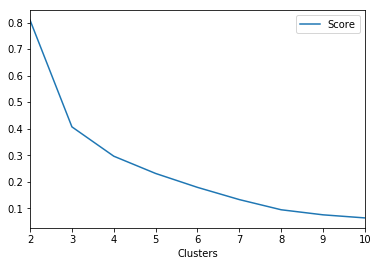

In [43]:
import matplotlib.pyplot as plt
clusterDf.plot(kind='line',x="Clusters",y="Score")
plt.show()

In [71]:
#fit for 4 clusters
mkeKMeans = KMeans(n_clusters=4, random_state=0)
mkeKMeans.fit(mke_principalDf)
# check cluster labels generated for each row in the dataframe
print(len(mkeKMeans.labels_))
len(mke_nh_venues_sorted)

45


45

In [72]:
mke_nh_venues_sorted.insert(0, 'Cluster Labels', mkeKMeans.labels_)

In [73]:
mke_merged = df

# merge mke_grouped with mke_data to add latitude/longitude for each neighborhood
mke_merged =mke_merged.join(mke_nh_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

mke_merged.dropna(inplace=True)

mke_merged # check the last columns!

Neighborhood Latitude Longitude  Cluster Labels City  \
1        Arlington Heights  43.0854  -87.9291             3.0  MKE   
2            Brewers' Hill  43.0564  -87.9098             0.0  MKE   
3         Franklin Heights  43.0826  -87.9453             0.0  MKE   
4                Granville  43.1775   -88.044             1.0  MKE   
5           Grover Heights  43.0938  -87.9217             0.0  MKE   
6             Halyard Park  43.0565  -87.9164             1.0  MKE   
7                 Harambee  43.0713   -87.913             1.0  MKE   
8              Bronzeville  43.0663  -87.9166             0.0  MKE   
10  Hillside / Lapham Park  43.0493  -87.9209             1.0  MKE   
11           Metcalfe Park  43.0643  -87.9543             3.0  MKE   
12                 Midtown  43.0525  -87.9448             0.0  MKE   
13               Park West  43.0679  -87.9424             0.0  MKE   
14            Sherman Park  43.0732  -87.9601             1.0  MKE   
15          Thurston Woods  43.1236  -87.9563             1.0  MKE   
16    Williamsburg Heights  43.0853   -87.913             0.0  MKE   
18                Bay View  42.9975  -87.8972             1.0  MKE   
19           Clarke Square  43.0208  -87.9404             0.0  MKE   
20             Holler Park  42.9487  -87.9166             0.0  MKE   
21            Jackson Park  42.9941  -87.9679             2.0  MKE   
22            Jones Island  43.0152  -87.8978             2.0  MKE   
23             Layton Park  43.0013  -87.9527             1.0  MKE   
24         Lincoln Village   43.002  -87.9248             0.0  MKE   
26              Tippecanoe  42.9762  -87.8953             1.0  MKE   
27            Town of Lake  42.9644  -87.9068             1.0  MKE   
28          Walker's Point  43.0238  -87.9221             0.0  MKE   
30         "The East Side"  43.0629  -87.8819             1.0  MKE   
31         Lower East Side  43.0536  -87.8897             1.0  MKE   
32            East Village  43.0551  -87.9006             1.0  MKE   
33             Murray Hill  43.0655   -87.883             0.0  MKE   
34               Riverwest  43.0723  -87.8991             3.0  MKE   
35              Beerline B  43.0544  -87.9067             0.0  MKE   
37            Avenues West  43.0394  -87.9363             0.0  MKE   
38         University Hill  43.0389  -87.9322             0.0  MKE   
39        Cold Spring Park  43.0469  -87.9527             0.0  MKE   
41            Enderis Park  43.0712  -87.9974             2.0  MKE   
42               Kops Park    43.08  -88.0207             1.0  MKE   
43        Grantosa Heights   43.114  -87.9996             3.0  MKE   
44            Martin Drive   43.047  -87.9889             0.0  MKE   
45            Merrill Park  43.0358  -87.9553             0.0  MKE   
47              Mount Mary  43.0731  -88.0296             0.0  MKE   
48              Story Hill  43.0339  -87.9763             1.0  MKE   
49             Walnut Hill  43.0545  -87.9539             0.0  MKE   
50      Washington Heights  43.0548  -87.9797             0.0  MKE   
51         Washington Park  43.0547  -87.9647             2.0  MKE   
53               East Town  43.0419  -87.9038             0.0  MKE   

     1st Most Common Venue       2nd Most Common Venue 3rd Most Common Venue  \
1        Fish & Chips Shop                      Lounge      Greek Restaurant   
2             Soccer Field                 Coffee Shop        Breakfast Spot   
3              Pizza Place                       Hotel         Grocery Store   
4                      Pub  Construction & Landscaping          Liquor Store   
5        Convenience Store                 Flower Shop           Music Store   
6               Shoe Store                 High School        Baseball Field   
7                 Pharmacy                      Lounge         Grocery Store   
8                 Pharmacy                 Coffee Shop                Lounge   
10                 Brewery                       Hotel                   

In [74]:
address = 'Milwaukee, WI'

geolocator = Nominatim(user_agent="mke_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Milwaukee are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Milwaukee are 43.0349931, -87.922497.


In [75]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

colors = ["red","orange","yellow","green","blue"]
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(mke_merged['Latitude'], mke_merged['Longitude'], mke_merged['Neighborhood'], mke_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=colors[int(cluster)],
        fill=True,
        fill_color=colors[int(cluster)],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Cluster 1

In [76]:
mke_merged.loc[mke_merged['Cluster Labels'] == 0,mke_merged.columns[[0] + list(range(3,mke_merged.shape[1]))]]

Neighborhood  Cluster Labels City   1st Most Common Venue  \
2          Brewers' Hill             0.0  MKE            Soccer Field   
3       Franklin Heights             0.0  MKE             Pizza Place   
5         Grover Heights             0.0  MKE       Convenience Store   
8            Bronzeville             0.0  MKE                Pharmacy   
12               Midtown             0.0  MKE       Convenience Store   
13             Park West             0.0  MKE       Convenience Store   
16  Williamsburg Heights             0.0  MKE  Thrift / Vintage Store   
19         Clarke Square             0.0  MKE      Mexican Restaurant   
20           Holler Park             0.0  MKE                   Hotel   
24       Lincoln Village             0.0  MKE      Mexican Restaurant   
28        Walker's Point             0.0  MKE      Mexican Restaurant   
33           Murray Hill             0.0  MKE             Coffee Shop   
35            Beerline B             0.0  MKE             Coffee Shop   
37          Avenues West             0.0  MKE     American Restaurant   
38       University Hill             0.0  MKE          Sandwich Place   
39      Cold Spring Park             0.0  MKE          Cosmetics Shop   
44          Martin Drive             0.0  MKE    Gym / Fitness Center   
45          Merrill Park             0.0  MKE         Bed & Breakfast   
47            Mount Mary             0.0  MKE      Mexican Restaurant   
49           Walnut Hill             0.0  MKE      Salon / Barbershop   
50    Washington Heights             0.0  MKE                    Food   
53             East Town             0.0  MKE                   Hotel   

   2nd Most Common Venue 3rd Most Common Venue     4th Most Common Venue  \
2            Coffee Shop        Breakfast Spot                      Park   
3                  Hotel         Grocery Store            Clothing Store   
5            Flower Shop           Music Store      Fast Food Restaurant   
8            Coffee Shop                Lounge              Liquor Store   
12                  Food                  Park              Liquor Store   
13          Burger Joint          Liquor Store            Sandwich Place   
16              Wine Bar          Liquor Store                      Bank   
19            Laundromat  Fast Food Restaurant        Athletics & Sports   
20        Clothing Store        Shipping Store                     Motel   
24         Deli / Bodega           Pizza Place         Convenience Store   
28    Spanish Restaurant          Cocktail Bar                 Nightclub   
33          Liquor Store     Food & Drink Shop            Hardware Store   
35           Pizza Place               Brewery        Chinese Restaurant   
37        Sandwich Place           Coffee Shop             Grocery Store   
38           Coffee Shop                 Diner  Mediterranean Restaurant   
39                  Farm    Seafood Restaurant                  Dive Bar   
44               Brewery         Bowling Alley                      Park   
45                  Park   American Restaurant                  Pharmacy   
47        Sandwich Place           Bus Station               Gas Station   
49            Sports Bar          Liquor Store                    Bakery   
50             BBQ Joint          Dessert Shop                    Garden   
53           Coffee Shop                Lounge                Steakhouse   

              5th Most Common Venue 6th Most Common Venue  \
2   Southern / Soul Food Restaurant    Salon / Barbershop   
3                      Liquor Store           Yoga Studio   
5                           Dog Run                  Farm   
8                              Café                  Bank   
12               Salon / Barbershop              Dive Bar   
13                   History Museum          Antique Shop   
16                      Yoga Studio                  Farm   
19                Recreation Center         Design Studio   
20                          Airpor

## Cluster 2

In [77]:
mke_merged.loc[mke_merged['Cluster Labels'] == 1,mke_merged.columns[[0] + list(range(3,mke_merged.shape[1]))]]

Neighborhood  Cluster Labels City 1st Most Common Venue  \
4                Granville             1.0  MKE                   Pub   
6             Halyard Park             1.0  MKE            Shoe Store   
7                 Harambee             1.0  MKE              Pharmacy   
10  Hillside / Lapham Park             1.0  MKE               Brewery   
14            Sherman Park             1.0  MKE        Cosmetics Shop   
15          Thurston Woods             1.0  MKE     Convenience Store   
18                Bay View             1.0  MKE                   Bar   
23             Layton Park             1.0  MKE                   Bar   
26              Tippecanoe             1.0  MKE           Pizza Place   
27            Town of Lake             1.0  MKE              Dive Bar   
30         "The East Side"             1.0  MKE           Pizza Place   
31         Lower East Side             1.0  MKE                   Bar   
32            East Village             1.0  MKE                   Bar   
42               Kops Park             1.0  MKE           Pizza Place   
48              Story Hill             1.0  MKE                  Park   

         2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
4   Construction & Landscaping          Liquor Store        Rental Service   
6                  High School        Baseball Field        Cosmetics Shop   
7                       Lounge         Grocery Store           Video Store   
10                       Hotel                   Bar                   Gym   
14         Fried Chicken Joint  Fast Food Restaurant                  Bank   
15              Cosmetics Shop                  Food          Liquor Store   
18     New American Restaurant              Dive Bar            Restaurant   
23          Mexican Restaurant                Bakery          Home Service   
26           Convenience Store           Flower Shop                  Park   
27  Construction & Landscaping   American Restaurant        Massage Studio   
30                         Bar        Sandwich Place           Coffee Shop   
31                 Yoga Studio           Coffee Shop            Restaurant   
32          Chinese Restaurant                  Park    Mexican Restaurant   
42                Home Service          Optical Shop    Mexican Restaurant   
48                  Sports Bar                   Bar           Pizza Place   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
4       Asian Restaurant        Sandwich Place    Mexican Restaurant   
6            Coffee Shop           Candy Store            Restaurant   
7                   Café        Baseball Field                   Bar   
10          Intersection           Beer Garden            Food Truck   
14                   Bar     Recreation Center         Grocery Store   
15                   Bar   Fried Chicken Joint            Donut Shop   
18                  Café    Chinese Restaurant           Record Shop   
23       Automotive Shop                 River     Electronics Store   
26          Liquor Store      Basketball Court                   Bar   
27                   Bar            Donut Shop        Farmers Market   
30                   Pub         Movie Theater   Japanese Restaurant   
31           Record Shop           Pizza Place       Thai Restaurant   
32               Brewery                Lounge    Italian Restaurant   
42     Martial Arts Dojo          Liquor Store                  Café   
48   American Restaurant          Intersection      Baseball Stadium   

        8th Most Common Venue  9th Most Common Venue 10th Most Common Venue  
4                         Bar                Dog Run   Ethiopian Restaurant  
6          Salon / Barbershop         Sandwich Place   Fast Food Restaurant  
7                        Bank  Check Cashing Service             Donut Shop  
10                 Restaurant            Yoga Studio                   Farm  
14                 Food Court    Dumpling Restaurant 

## Cluster 3

In [78]:
mke_merged.loc[mke_merged['Cluster Labels'] == 2,mke_merged.columns[[0] + list(range(3,mke_merged.shape[1]))]]

Neighborhood  Cluster Labels City 1st Most Common Venue  \
21     Jackson Park             2.0  MKE                  Pool   
22     Jones Island             2.0  MKE       Harbor / Marina   
41     Enderis Park             2.0  MKE                  Park   
51  Washington Park             2.0  MKE                  Park   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
21            Playground                  Park            Distillery   
22                  Park        Scenic Lookout           Yoga Studio   
41        Farmers Market            Playground   Sporting Goods Shop   
51  Other Great Outdoors                   Bar           Yoga Studio   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
21  Ethiopian Restaurant   Empanada Restaurant     Electronics Store   
22              Dive Bar  Ethiopian Restaurant   Empanada Restaurant   
41         Grocery Store    Salon / Barbershop            Distillery   
51               Dog Run                  Farm  Ethiopian Restaurant   

          8th Most Common Venue        9th Most Common Venue  \
21  Eastern European Restaurant          Dumpling Restaurant   
22            Electronics Store  Eastern European Restaurant   
41          Empanada Restaurant            Electronics Store   
51          Empanada Restaurant            Electronics Store   

         10th Most Common Venue  
21                   Donut Shop  
22          Dumpling Restaurant  
41  Eastern European Restaurant  
51  Eastern European Restaurant

## Cluster 4

In [79]:
mke_merged.loc[mke_merged['Cluster Labels'] == 3,mke_merged.columns[[0] + list(range(3,mke_merged.shape[1]))]]

Neighborhood  Cluster Labels City 1st Most Common Venue  \
1   Arlington Heights             3.0  MKE     Fish & Chips Shop   
11      Metcalfe Park             3.0  MKE           Video Store   
34          Riverwest             3.0  MKE                   Bar   
43   Grantosa Heights             3.0  MKE                   Bar   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
1                 Lounge      Greek Restaurant                   Bar   
11         Grocery Store                   Bar        Sandwich Place   
34                 Trail             Gastropub             Rock Club   
43   Fried Chicken Joint         Grocery Store           Yoga Studio   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
1                Dog Run        Farmers Market                  Farm   
11           Yoga Studio               Dog Run                  Farm   
34        Discount Store                 Diner               Brewery   
43               Dog Run                  Farm  Ethiopian Restaurant   

   8th Most Common Venue 9th Most Common Venue       10th Most Common Venue  
1   Ethiopian Restaurant   Empanada Restaurant            Electronics Store  
11  Ethiopian Restaurant   Empanada Restaurant            Electronics Store  
34           Coffee Shop          Intersection           Mexican Restaurant  
43   Empanada Restaurant     Electronics Store  Eastern European Restaurant

## Comparision

In [80]:
#Let's make a new data set with all neighborhoods in it and run it through clustering to see what we get

alldf = df.append(pdxdf)

allNH_grouped_clustering = mke_grouped_clustering.append(pdx_grouped_clustering)

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [81]:

allNH_grouped_clustering.fillna(0,inplace=True)
#allNH_grouped_clustering=allNH_grouped_clustering.drop("City",axis=1)
allNH_grouped_clustering.head()

ATM  Accessories Store  African Restaurant  Airport  Airport Terminal  \
0  0.0                0.0                 0.0      0.0               0.0   
1  0.0                0.0                 0.0      0.0               0.0   
2  0.0                0.0                 0.0      0.0               0.0   
3  0.0                0.0                 0.0      0.0               0.0   
4  0.0                0.0                 0.0      0.0               0.0   

   American Restaurant  Amphitheater  Antique Shop    Arcade  Art Gallery  \
0             0.000000           0.0           0.0  0.000000          0.0   
1             0.000000           0.0           0.0  0.000000          0.0   
2             0.071429           0.0           0.0  0.000000          0.0   
3             0.031250           0.0           0.0  0.000000          0.0   
4             0.027778           0.0           0.0  0.027778          0.0   

   Art Museum  Arts & Crafts Store  Arts & Entertainment  Asian Restaurant  \
0         0.0                  0.0                   0.0          0.028571   
1         0.0                  0.0                   0.0          0.000000   
2         0.0                  0.0                   0.0          0.023810   
3         0.0                  0.0                   0.0          0.000000   
4         0.0                  0.0                   0.0          0.000000   

   Athletics & Sports  Auto Dealership  Auto Garage  Auto Workshop  \
0            0.000000              0.0          0.0            0.0   
1            0.000000              0.0          0.0            0.0   
2            0.000000              0.0          0.0            0.0   
3            0.000000              0.0          0.0            0.0   
4            0.027778              0.0          0.0            0.0   

   Automotive Shop  BBQ Joint  Bagel Shop    Bakery      Bank       Bar  \
0              0.0    0.00000     0.00000  0.028571  0.028571  0.057143   
1              0.0    0.00000     0.00000  0.000000  0.000000  0.250000   
2              0.0    0.02381     0.02381  0.000000  0.000000  0.023810   
3              0.0    0.00000     0.00000  0.031250  0.000000  0.093750   
4              0.0    0.00000     0.00000  0.000000  0.000000  0.000000   

   Baseball Field  Baseball Stadium  Basketball Court  Bed & Breakfast  \
0             0.0               0.0               0.0              0.0   
1             0.0               0.0               0.0              0.0   
2             0.0               0.0               0.0              0.0   
3             0.0               0.0               0.0              0.0   
4             0.0               0.0               0.0              0.0   

   Beer Bar  Beer Garden  Beer Store  Big Box Store  Bike Rental / Bike Share  \
0  0.028571          0.0         0.0            0.0                       0.0   
1  0.000000          0.0         0.0            0.0                       0.0   
2  0.000000          0.0         0.0            0.0                       0.0   
3  0.000000          0.0         0.0            0.0                       0.0   
4  0.000000          0.0         0.0            0.0                       0.0   

   Bike Shop  Bistro  Board Shop  Bookstore  Botanical Garden  Boutique  \
0        0.0     0.0         0.0   0.028571               0.0       0.0   
1        0.0     0.0         0.0   0.000000               0.0       0.0   
2        0.0     0.0         0.0   0.000000               0.0       0.0   
3        0.0     0.0         0.0   0.000000               0.0       0.0   
4        0.0     0.0         0.0   0.000000               0.0       0.0   

   Bowling Alley  Brazilian Restaurant  Breakfast Spot   Brewery  Bridal Shop  \
0       0.028571                   0.0        0.000000  0.000000          0.0   
1       0.000000                   0.0        0.000000  0.000000          0.0   
2       0.023810                   0.0        0.023810  0.000000          0.0   
3       0.000000                   

In [82]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(allNH_grouped_clustering)
all_principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc22'])




kMeans = {}
clusterData = []

for kclusters in range(2,11):
    # run k-means clustering
    testKMeans = KMeans(n_clusters=kclusters, random_state=0)
    score = testKMeans.fit(all_principalDf).inertia_
    print("Clusters: ", kclusters, " Score: ", score)
    clusterData.append([kclusters,score])


Clusters:  2  Score:  3.0210155996075043
Clusters:  3  Score:  1.8600350882681573
Clusters:  4  Score:  0.9233596772925912
Clusters:  5  Score:  0.6794954295135451
Clusters:  6  Score:  0.477096078847567
Clusters:  7  Score:  0.3250864554338436
Clusters:  8  Score:  0.24257440316077464
Clusters:  9  Score:  0.17684731090039713
Clusters:  10  Score:  0.12738313159511006


In [83]:
clusterDf  = pd.DataFrame(clusterData,columns=["Clusters","Score"])

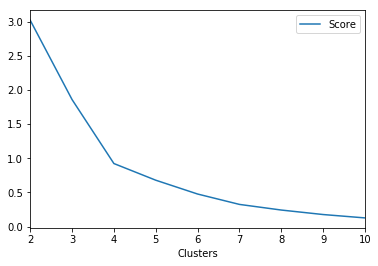

In [84]:
import matplotlib.pyplot as plt
clusterDf.plot(kind='line',x="Clusters",y="Score")
plt.show()

In [85]:
allKMeans = KMeans(n_clusters=4, random_state=0)
allKMeans.fit(all_principalDf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [90]:
#combine the string-based datasets

#mke_nh_venues_sorted=mke_nh_venues_sorted.drop(columns=['Cluster Labels'],axis=1)
#pdx_nh_venues_sorted=pdx_nh_venues_sorted.drop(columns=['Cluster Labels'],axis=1)
all_nh_venues_sorted ={}

#mke_nh_venues_sorted.insert(0,"City","MKE")
#pdx_nh_venues_sorted.insert(0,"City","PDX")

all_nh_venues_sorted = mke_nh_venues_sorted.append(pdx_nh_venues_sorted)

all_nh_venues_sorted.insert(0, 'Cluster Labels', allKMeans.labels_)
all_nh_venues_sorted

Cluster Labels City            Neighborhood   1st Most Common Venue  \
0                2  MKE         "The East Side"             Pizza Place   
1                2  MKE       Arlington Heights       Fish & Chips Shop   
2                2  MKE            Avenues West     American Restaurant   
3                2  MKE                Bay View                     Bar   
4                2  MKE              Beerline B             Coffee Shop   
5                2  MKE           Brewers' Hill            Soccer Field   
6                2  MKE             Bronzeville                Pharmacy   
7                2  MKE           Clarke Square      Mexican Restaurant   
8                2  MKE        Cold Spring Park          Cosmetics Shop   
9                2  MKE               East Town                   Hotel   
10               2  MKE            East Village                     Bar   
11               1  MKE            Enderis Park                    Park   
12               2  MKE        Franklin Heights             Pizza Place   
13               2  MKE        Grantosa Heights                     Bar   
14               2  MKE               Granville                     Pub   
15               2  MKE          Grover Heights       Convenience Store   
16               2  MKE            Halyard Park              Shoe Store   
17               2  MKE                Harambee                Pharmacy   
18               2  MKE  Hillside / Lapham Park                 Brewery   
19               2  MKE             Holler Park                   Hotel   
20               1  MKE            Jackson Park                    Pool   
21               1  MKE            Jones Island         Harbor / Marina   
22               2  MKE               Kops Park             Pizza Place   
23               2  MKE             Layton Park                     Bar   
24               2  MKE         Lincoln Village      Mexican Restaurant   
25               2  MKE         Lower East Side                     Bar   
26               2  MKE            Martin Drive    Gym / Fitness Center   
27               2  MKE            Merrill Park         Bed & Breakfast   
28               2  MKE           Metcalfe Park             Video Store   
29               1  MKE                 Midtown       Convenience Store   
30               2  MKE              Mount Mary      Mexican Restaurant   
31               2  MKE             Murray Hill             Coffee Shop   
32               2  MKE               Park West       Convenience Store   
33               2  MKE               Riverwest                     Bar   
34               2  MKE            Sherman Park          Cosmetics Shop   
35               1  MKE              Story Hill                    Park   
36               2  MKE          Thurston Woods       Convenience Store   
37               2  MKE              Tippecanoe             Pizza Place   
38               2  MKE            Town of Lake                Dive Bar   
39               2  MKE         University Hill          Sandwich Place   
40               2  MKE          Walker's Point      Mexican Restaurant   
41               2  MKE             Walnut Hill      Salon / Barbershop   
42               2  MKE      Washington Heights                    Food   
43               1  MKE         Washington Park                    Park   
44               2  MKE    Williamsburg Heights  Thrift / Vintage Store   
0                2  PDX                 Alameda      Italian Restaurant   
1                2  PDX             Arbor Lodge       Convenience Store   
2                2  PDX               Ardenwald          Clothing Store   
3                2  PDX                   Argay         Thai Restaurant   
4                2  PDX       Arlington Heights                  Garden   
5                2  PDX            Arnold Creek           Moving Target   
6                1  PDX               Ash Creek            Concert Hall   
7                2  PDX      

In [91]:
all_merged = alldf

# merge mke_grouped with mke_data to add latitude/longitude for each neighborhood
all_merged =all_merged.join(all_nh_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

all_merged.dropna(inplace=True)

all_merged # check the last columns!

Neighborhood Latitude Longitude  Cluster Labels City  \
1        Arlington Heights  43.0854  -87.9291             2.0  MKE   
1        Arlington Heights  43.0854  -87.9291             2.0  PDX   
2            Brewers' Hill  43.0564  -87.9098             2.0  MKE   
3         Franklin Heights  43.0826  -87.9453             2.0  MKE   
4                Granville  43.1775   -88.044             2.0  MKE   
5           Grover Heights  43.0938  -87.9217             2.0  MKE   
6             Halyard Park  43.0565  -87.9164             2.0  MKE   
7                 Harambee  43.0713   -87.913             2.0  MKE   
8              Bronzeville  43.0663  -87.9166             2.0  MKE   
10  Hillside / Lapham Park  43.0493  -87.9209             2.0  MKE   
11           Metcalfe Park  43.0643  -87.9543             2.0  MKE   
12                 Midtown  43.0525  -87.9448             1.0  MKE   
13               Park West  43.0679  -87.9424             2.0  MKE   
14            Sherman Park  43.0732  -87.9601             2.0  MKE   
15          Thurston Woods  43.1236  -87.9563             2.0  MKE   
16    Williamsburg Heights  43.0853   -87.913             2.0  MKE   
18                Bay View  42.9975  -87.8972             2.0  MKE   
19           Clarke Square  43.0208  -87.9404             2.0  MKE   
20             Holler Park  42.9487  -87.9166             2.0  MKE   
21            Jackson Park  42.9941  -87.9679             1.0  MKE   
22            Jones Island  43.0152  -87.8978             1.0  MKE   
23             Layton Park  43.0013  -87.9527             2.0  MKE   
24         Lincoln Village   43.002  -87.9248             2.0  MKE   
26              Tippecanoe  42.9762  -87.8953             2.0  MKE   
27            Town of Lake  42.9644  -87.9068             2.0  MKE   
28          Walker's Point  43.0238  -87.9221             2.0  MKE   
30         "The East Side"  43.0629  -87.8819             2.0  MKE   
31         Lower East Side  43.0536  -87.8897             2.0  MKE   
32            East Village  43.0551  -87.9006             2.0  MKE   
33             Murray Hill  43.0655   -87.883             2.0  MKE   
34               Riverwest  43.0723  -87.8991             2.0  MKE   
35              Beerline B  43.0544  -87.9067             2.0  MKE   
37            Avenues West  43.0394  -87.9363             2.0  MKE   
38         University Hill  43.0389  -87.9322             2.0  MKE   
39        Cold Spring Park  43.0469  -87.9527             2.0  MKE   
41            Enderis Park  43.0712  -87.9974             1.0  MKE   
42               Kops Park    43.08  -88.0207             2.0  MKE   
43        Grantosa Heights   43.114  -87.9996             2.0  MKE   
44            Martin Drive   43.047  -87.9889             2.0  MKE   
45            Merrill Park  43.0358  -87.9553             2.0  MKE   
47              Mount Mary  43.0731  -88.0296             2.0  MKE   
48              Story Hill  43.0339  -87.9763             1.0  MKE   
49             Walnut Hill  43.0545  -87.9539             2.0  MKE   
50      Washington Heights  43.0548  -87.9797             2.0  MKE   
51         Washington Park  43.0547  -87.9647             1.0  MKE   
53               East Town  43.0419  -87.9038             2.0  MKE   
0                  Alameda  45.5486  -122.636             2.0  PDX   
1              Arbor Lodge  45.5718   -122.69             2.0  PDX   
2                Ardenwald  45.4642  -122.638             2.0  PDX   
3                    Argay  45.5528  -122.523             2.0  PDX   
4        Arlington Heights  45.5195  -122.711             2.0  MKE   
4        Arlington Heights  45.5195  -122.711             2.0  PDX   
5             Arnold Creek  45.4443  -122.713             2.0  PDX   
6                Ash Creek  45.4613  -122.742             1.0  PDX   
7        Beaumont Wilshire  45.5504  -122.624             2.0  PDX   
8                    Boise  45.5502  -122.672             2.0  PDX   
9     Brentwood Darlingt

### Cluster 1

In [92]:
all_merged.loc[all_merged['Cluster Labels'] == 0,all_merged.columns[[0] + list(range(1,all_merged.shape[1]))]]

Neighborhood Latitude Longitude  Cluster Labels City  \
24  Eastmoreland  45.4736  -122.631             0.0  PDX   
90        Wilkes  45.5412  -122.505             0.0  PDX   

   1st Most Common Venue        2nd Most Common Venue 3rd Most Common Venue  \
24            Food Truck                         Park           Zoo Exhibit   
90            Food Truck  Eastern European Restaurant     Food & Drink Shop   

          4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
24  Eastern European Restaurant     Fondue Restaurant           Flower Shop   
90                         Food     Fondue Restaurant           Flower Shop   

   7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
24           Flea Market           Fish Market  Fast Food Restaurant   
90           Flea Market           Fish Market  Fast Food Restaurant   

   10th Most Common Venue  
24         Farmers Market  
90         Farmers Market

### Cluster 2

In [93]:
all_merged.loc[all_merged['Cluster Labels'] == 1,all_merged.columns[[0] + list(range(1,all_merged.shape[1]))]]

Neighborhood Latitude Longitude  Cluster Labels City  \
12               Midtown  43.0525  -87.9448             1.0  MKE   
21          Jackson Park  42.9941  -87.9679             1.0  MKE   
22          Jones Island  43.0152  -87.8978             1.0  MKE   
41          Enderis Park  43.0712  -87.9974             1.0  MKE   
48            Story Hill  43.0339  -87.9763             1.0  MKE   
51       Washington Park  43.0547  -87.9647             1.0  MKE   
6              Ash Creek  45.4613  -122.742             1.0  PDX   
9   Brentwood Darlington  45.4687  -122.598             1.0  PDX   
11            Bridlemile  45.4926  -122.727             1.0  PDX   
23         East Columbia  45.5938  -122.664             1.0  PDX   
26         Far Southwest  45.4399  -122.736             1.0  PDX   
34              Hayhurst  45.4815  -122.729             1.0  PDX   
38              Hillside  45.5274  -122.713             1.0  PDX   
52             Maplewood  45.4719  -122.734             1.0  PDX   
55             Mill Park  45.5116  -122.539             1.0  PDX   
57       Mt Scott Arleta  45.4814  -122.591             1.0  PDX   
61     Northwest Heights  45.5408  -122.774             1.0  PDX   
65      Parkrose Heights  45.5402  -122.548             1.0  PDX   
76               Russell  45.5388  -122.527             1.0  PDX   
89    West Portland Park  45.4473  -122.721             1.0  PDX   

   1st Most Common Venue 2nd Most Common Venue        3rd Most Common Venue  \
12     Convenience Store                  Food                         Park   
21                  Pool            Playground                         Park   
22       Harbor / Marina                  Park               Scenic Lookout   
41                  Park        Farmers Market                   Playground   
48                  Park            Sports Bar                          Bar   
51                  Park  Other Great Outdoors                          Bar   
6           Concert Hall           Salad Place                         Park   
9                   Park               Dog Run                Deli / Bodega   
11                  Park          Tennis Court                         Farm   
23                Casino                  Park              Auto Dealership   
26                 Hotel                  Park            College Cafeteria   
34      Recording Studio                  Park  Eastern European Restaurant   
38                 Trail                  Park                       Museum   
52                  Park        Baseball Field                  Coffee Shop   
55           Pizza Place     Convenience Store           Chinese Restaurant   
57                  Park           Coffee Shop                       Bakery   
61                  Park      Business Service                  Bridal Shop   
65                  Park              Bus Line                Grocery Store   
76          Concert Hall                  Park  Eastern European Restaurant   
89     Convenience Store  Gym / Fitness Center               Sandwich Place   

   4th Most Common Venue        5th Most Common Venue 6th Most Common Venue  \
12          Liquor Store           Salon / Barbershop              Dive Bar   
21            Distillery         Ethiopian Restaurant   Empanada Restaurant   
22           Yoga Studio                     Dive Bar  Ethiopian Restaurant   
41   Sporting Goods Shop                Grocery Store    Salon / Barbershop   
48           Pizza Place          American Restaurant          Intersection   
51           Yoga Studio                      Dog Run                  Farm   
6      Fondue Restaurant                  Flower Shop           Flea Market   
9         Farmers Market            Elementary School  Ethiopian Restaurant   
11     Electronics Store            Elementary School  Ethiopian Restaurant   
23           Zoo Exhibit  Eastern European Restaurant     Elementary School   
26           Bus Station                  Zoo Exhibit 

### Cluster 3

In [106]:
cluster3 = all_merged.loc[all_merged['Cluster Labels'] == 2,all_merged.columns[[0] + list(range(1,all_merged.shape[1]))]]
cluster3

Neighborhood Latitude Longitude  Cluster Labels City  \
1        Arlington Heights  43.0854  -87.9291             2.0  MKE   
1        Arlington Heights  43.0854  -87.9291             2.0  PDX   
2            Brewers' Hill  43.0564  -87.9098             2.0  MKE   
3         Franklin Heights  43.0826  -87.9453             2.0  MKE   
4                Granville  43.1775   -88.044             2.0  MKE   
5           Grover Heights  43.0938  -87.9217             2.0  MKE   
6             Halyard Park  43.0565  -87.9164             2.0  MKE   
7                 Harambee  43.0713   -87.913             2.0  MKE   
8              Bronzeville  43.0663  -87.9166             2.0  MKE   
10  Hillside / Lapham Park  43.0493  -87.9209             2.0  MKE   
11           Metcalfe Park  43.0643  -87.9543             2.0  MKE   
13               Park West  43.0679  -87.9424             2.0  MKE   
14            Sherman Park  43.0732  -87.9601             2.0  MKE   
15          Thurston Woods  43.1236  -87.9563             2.0  MKE   
16    Williamsburg Heights  43.0853   -87.913             2.0  MKE   
18                Bay View  42.9975  -87.8972             2.0  MKE   
19           Clarke Square  43.0208  -87.9404             2.0  MKE   
20             Holler Park  42.9487  -87.9166             2.0  MKE   
23             Layton Park  43.0013  -87.9527             2.0  MKE   
24         Lincoln Village   43.002  -87.9248             2.0  MKE   
26              Tippecanoe  42.9762  -87.8953             2.0  MKE   
27            Town of Lake  42.9644  -87.9068             2.0  MKE   
28          Walker's Point  43.0238  -87.9221             2.0  MKE   
30         "The East Side"  43.0629  -87.8819             2.0  MKE   
31         Lower East Side  43.0536  -87.8897             2.0  MKE   
32            East Village  43.0551  -87.9006             2.0  MKE   
33             Murray Hill  43.0655   -87.883             2.0  MKE   
34               Riverwest  43.0723  -87.8991             2.0  MKE   
35              Beerline B  43.0544  -87.9067             2.0  MKE   
37            Avenues West  43.0394  -87.9363             2.0  MKE   
38         University Hill  43.0389  -87.9322             2.0  MKE   
39        Cold Spring Park  43.0469  -87.9527             2.0  MKE   
42               Kops Park    43.08  -88.0207             2.0  MKE   
43        Grantosa Heights   43.114  -87.9996             2.0  MKE   
44            Martin Drive   43.047  -87.9889             2.0  MKE   
45            Merrill Park  43.0358  -87.9553             2.0  MKE   
47              Mount Mary  43.0731  -88.0296             2.0  MKE   
49             Walnut Hill  43.0545  -87.9539             2.0  MKE   
50      Washington Heights  43.0548  -87.9797             2.0  MKE   
53               East Town  43.0419  -87.9038             2.0  MKE   
0                  Alameda  45.5486  -122.636             2.0  PDX   
1              Arbor Lodge  45.5718   -122.69             2.0  PDX   
2                Ardenwald  45.4642  -122.638             2.0  PDX   
3                    Argay  45.5528  -122.523             2.0  PDX   
4        Arlington Heights  45.5195  -122.711             2.0  MKE   
4        Arlington Heights  45.5195  -122.711             2.0  PDX   
5             Arnold Creek  45.4443  -122.713             2.0  PDX   
7        Beaumont Wilshire  45.5504  -122.624             2.0  PDX   
8                    Boise  45.5502  -122.672             2.0  PDX   
10               Bridgeton  45.6024  -122.668             2.0  PDX   
12                Brooklyn  45.4948  -122.652             2.0  PDX   
13                 Buckman  45.5174  -122.652             2.0  PDX   
14              Centennial  45.5056    -122.5             2.0  PDX   
15                  Center  45.5202  -122.674             2.0  PDX   
16            Collins View   45.458  -122.681             2.0  PDX   
17               Concordia  45.5659  -122.632             2.0  PDX   
19      Creston Kenilwor

In [110]:
mke = cluster3.loc[cluster3["City"] == "MKE"]
pdx = cluster3.loc[cluster3["City"] == "PDX"]
print("MKE: ", mke.shape, " PDX: ", pdx.shape)

MKE:  (40, 15)  PDX:  (70, 15)


### Cluster 4

In [95]:
all_merged.loc[all_merged['Cluster Labels'] == 3,all_merged.columns[[0] + list(range(1,all_merged.shape[1]))]]

Neighborhood Latitude Longitude  Cluster Labels City  \
30         Glenfair  45.5227  -122.504             3.0  PDX   
32       Grant Park  45.5401  -122.628             3.0  PDX   
36    Healy Heights  45.4925  -122.699             3.0  PDX   
69  Pleasant Valley   45.472  -122.507             3.0  PDX   

   1st Most Common Venue 2nd Most Common Venue        3rd Most Common Venue  \
30                  Park           Zoo Exhibit  Eastern European Restaurant   
32                  Park           Zoo Exhibit  Eastern European Restaurant   
36                  Park           Zoo Exhibit  Eastern European Restaurant   
69                  Park           Zoo Exhibit  Eastern European Restaurant   

   4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
30                  Food     Fondue Restaurant           Flower Shop   
32                  Food     Fondue Restaurant           Flower Shop   
36                  Food     Fondue Restaurant           Flower Shop   
69                  Food     Fondue Restaurant           Flower Shop   

   7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
30           Flea Market           Fish Market  Fast Food Restaurant   
32           Flea Market           Fish Market  Fast Food Restaurant   
36           Flea Market           Fish Market  Fast Food Restaurant   
69           Flea Market           Fish Market  Fast Food Restaurant   

   10th Most Common Venue  
30         Farmers Market  
32         Farmers Market  
36         Farmers Market  
69         Farmers Market

In [96]:
pdx_describe = pdx_grouped.describe()
pdx_val = pdx_describe.sort_values('mean', axis=1, ascending=False, inplace=False, kind='quicksort', na_position='last')
pdx_val

Park  Coffee Shop  Food Truck        Bar   Bus Stop  Pizza Place  \
count  89.000000    89.000000   89.000000  89.000000  89.000000    89.000000   
mean    0.113195     0.046610    0.033822   0.033295   0.026621     0.026230   
std     0.232223     0.067296    0.123995   0.072296   0.068467     0.053294   
min     0.000000     0.000000    0.000000   0.000000   0.000000     0.000000   
25%     0.000000     0.000000    0.000000   0.000000   0.000000     0.000000   
50%     0.000000     0.000000    0.000000   0.000000   0.000000     0.000000   
75%     0.100000     0.065934    0.010989   0.037736   0.011765     0.035714   
max     1.000000     0.333333    1.000000   0.500000   0.500000     0.400000   

       Convenience Store  Mexican Restaurant  Playground      Trail  \
count          89.000000           89.000000   89.000000  89.000000   
mean            0.024567            0.020860    0.017466   0.017015   
std             0.058544            0.048431    0.112129   0.111842   
min             0.000000            0.000000    0.000000   0.000000   
25%             0.000000            0.000000    0.000000   0.000000   
50%             0.000000            0.000000    0.000000   0.000000   
75%             0.000000            0.012987    0.000000   0.000000   
max             0.250000            0.250000    1.000000   1.000000   

       Thai Restaurant  Grocery Store  Sandwich Place  Gas Station  \
count        89.000000      89.000000       89.000000    89.000000   
mean          0.016396       0.015174        0.012773     0.012487   
std           0.059390       0.037057        0.034819     0.051358   
min           0.000000       0.000000        0.000000     0.000000   
25%           0.000000       0.000000        0.000000     0.000000   
50%           0.000000       0.000000        0.000000     0.000000   
75%           0.000000       0.010989        0.000000     0.000000   
max           0.500000       0.250000        0.200000     0.333333   

       Moving Target  Photography Studio        Gym  Concert Hall  \
count      89.000000           89.000000  89.000000     89.000000   
mean        0.011359            0.011236   0.010861      0.010309   
std         0.105993            0.106000   0.033338      0.063418   
min         0.000000            0.000000   0.000000      0.000000   
25%         0.000000            0.000000   0.000000      0.000000   
50%         0.000000            0.000000   0.000000      0.000000   
75%         0.000000            0.000000   0.000000      0.000000   
max         1.000000            1.000000   0.250000      0.500000   

       Furniture / Home Store  Marijuana Dispensary  American Restaurant  \
count               89.000000             89.000000            89.000000   
mean                 0.009679              0.009459             0.009310   
std                  0.054312              0.031890             0.024373   
min                  0.000000              0.000000             0.000000   
25%                  0.000000              0.000000             0.000000   
50%                  0.000000              0.000000             0.000000   
75%                  0.000000              0.000000             0.000000   
max                  0.500000              0.200000             0.166667   

            Café  Tennis Court      Hotel     Garden  Bus Station       Food  \
count  89.000000     89.000000  89.000000  89.000000    89.000000  89.000000   
mean    0.009246      0.009051   0.008621   0.008099     0.007976   0.007865   
std     0.018262      0.059189   0.032137   0.044098     0.035648   0.056859   
min     0.000000      0.000000   0.000000   0.000000     0.000000   0.000000   
25%     0.000000      0.000000   0.000000   0.000000     0.000000   0.000000   
50%     0.000000      0.000000   0.000000   0.000000     0.000000   0.000000   
75%     0.000000      0.000000   0.000000   0.000000     0.000000   0.000000   
max     0.071429      0.500000   0.250000   0.333333     0.250000   0.500

In [97]:
mke_describe = mke_grouped.describe()
mke_val = mke_describe.sort_values('mean', axis=1, ascending=False, inplace=False, kind='quicksort', na_position='last')
mke_val

Bar       Park  Liquor Store  Mexican Restaurant  Grocery Store  \
count  45.000000  45.000000     45.000000           45.000000      45.000000   
mean    0.074980   0.059128      0.044973            0.035900       0.029296   
std     0.107250   0.110431      0.074344            0.069426       0.063313   
min     0.000000   0.000000      0.000000            0.000000       0.000000   
25%     0.000000   0.000000      0.000000            0.000000       0.000000   
50%     0.018868   0.000000      0.000000            0.000000       0.000000   
75%     0.125000   0.058824      0.076923            0.043478       0.027778   
max     0.500000   0.500000      0.250000            0.250000       0.250000   

       Convenience Store  Pizza Place  Sandwich Place  Cosmetics Shop  \
count          45.000000    45.000000       45.000000       45.000000   
mean            0.028215     0.023971        0.023656        0.019438   
std             0.072569     0.045694        0.056523        0.059712   
min             0.000000     0.000000        0.000000        0.000000   
25%             0.000000     0.000000        0.000000        0.000000   
50%             0.000000     0.000000        0.000000        0.000000   
75%             0.000000     0.031250        0.000000        0.000000   
max             0.333333     0.200000        0.250000        0.333333   

       Coffee Shop  Fried Chicken Joint       Food  Salon / Barbershop  \
count    45.000000            45.000000  45.000000           45.000000   
mean      0.018033             0.017429   0.016863            0.016806   
std       0.031466             0.051940   0.062076            0.051740   
min       0.000000             0.000000   0.000000            0.000000   
25%       0.000000             0.000000   0.000000            0.000000   
50%       0.000000             0.000000   0.000000            0.000000   
75%       0.035714             0.000000   0.000000            0.000000   
max       0.111111             0.250000   0.333333            0.250000   

       American Restaurant    Brewery     Lounge   Pharmacy       Café  \
count            45.000000  45.000000  45.000000  45.000000  45.000000   
mean              0.016537   0.016344   0.015095   0.014915   0.014798   
std               0.038933   0.052435   0.044410   0.040817   0.029512   
min               0.000000   0.000000   0.000000   0.000000   0.000000   
25%               0.000000   0.000000   0.000000   0.000000   0.000000   
50%               0.000000   0.000000   0.000000   0.000000   0.000000   
75%               0.000000   0.000000   0.000000   0.000000   0.017857   
max               0.200000   0.333333   0.250000   0.200000   0.111111   

       Video Store      Hotel  Fast Food Restaurant       Bank  Playground  \
count    45.000000  45.000000             45.000000  45.000000   45.000000   
mean      0.014723   0.014058              0.013466   0.013257    0.012810   
std       0.045948   0.045956              0.044673   0.044306    0.053873   
min       0.000000   0.000000              0.000000   0.000000    0.000000   
25%       0.000000   0.000000              0.000000   0.000000    0.000000   
50%       0.000000   0.000000              0.000000   0.000000    0.000000   
75%       0.000000   0.000000              0.000000   0.000000    0.000000   
max       0.250000   0.200000              0.250000   0.250000    0.333333   

          Bakery        Pub  Intersection  Sports Bar  Restaurant  \
count  45.000000  45.000000     45.000000   45.000000   45.000000   
mean    0.012596   0.011475      0.011016    0.010000    0.009890   
std     0.041689   0.035917      0.023919    0.047194    0.021132   
min     0.000000   0.000000      0.000000    0.000000    0.000000   
25%     0.000000   0.000000      0.000000    0.000000    0.000000   
50%     0.000000   0.000000      0.000000    0.000000    0.000000   
75%     0.000000   0.000000      0.000000    0.000000    0.000000   
max     0.250000   0.222222      0.100000    